#### interactive descriptive statistics

Different distribution functions can be parameterized and visualized interactively.

**Selectable functions:**
- normal distribution (Gaussian function), [scipy-link](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

- Gamma-Poisson distribution (negative binomial distribution),[scipy-link](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.nbinom.html#scipy.stats.nbinom)

- Poisson distribution, [scipy-link](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)

- Weibull distribution, [scipy-link](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.weibull_min.html)


In [1]:
# resources
#
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, norm, nbinom, weibull_min, mode

#set backend for interactive toolbar
# %matplotlib nbagg
%matplotlib widget

In [2]:
# Warnings are issued while the samples are being calculated and the t-test is being performed.
# These are switched off here
import warnings
warnings.filterwarnings('ignore')

In [3]:
#interactive switches

#
# Signal selection
distribFuns = ['Poisson distribution', 'Gamma-Poisson distribution', 'Normal distribution', 'Weibull distribution']
distrib_select = widgets.Dropdown(description = '', options = distribFuns, value = 'Normal distribution',\
                                   layout = widgets.Layout(width='75%', height='auto'))
signalSelect = widgets.VBox([
    widgets.Label(value="signal selection:"),
    distrib_select
])


layout= widgets.Layout(width='90%',height='auto')
style = {'description_width': 'initial'}
#
# Function parameters
#
# Number of random values
size = widgets.BoundedIntText(value=1000, min=20, max=100000,layout= {'width': '30%'})
sizeBox = widgets.VBox([
    widgets.Label(value="sample size (max.100000)"),
    size
])

# ------------------------------------------------------------------------------------------------------------------------------
#
# Gauss: µ: expected value, \ sigma: standard deviation
normLabel_1 = "µ: (expected value)"
normLabel_2 = "$\sigma$: (standard deviation)"
# ------------------------------------------------------------------------------------------------------------------------------
#
# Weibull: - Scale and shape parameters
wblLabel_1 = "k: shape parameter (k > 0)"
wblLabel_2 = "$\lambda$: (scale parameter $\lambda$.$1 \over \lambda > 0$.)"
wblLabel_3 = "µ: (location parameter)"
# ------------------------------------------------------------------------------------------------------------------------------
#
# Gamma-Poisson => negative binomial distribution: n: number of successes, p: individual probability
nbLabel_1 = "Number of successes n ($n > 0$).$mean \over varianz$"
nbLabel_2 = "individual probability p (0 ... 1). $(mean²\over (var - mean))$"
# ------------------------------------------------------------------------------------------------------------------------------
#
# Poisson: expected value and variance µ (divided by Gauss - expected value)
#
poissonLabel = "$\lambda$: expected value and variance"
#
# widget-box with 3 sliders 
interakt = widgets.VBox([\
                         widgets.Label(value="",layout=layout),
                         widgets.FloatSlider(min=0.1,max=100.0,value=0.5,continuous_update=False, layout=layout),
                         widgets.Label(value="",layout=layout),
                         widgets.FloatSlider(min=0.1,max=100.0,value=0.5,continuous_update=False, layout=layout),
                         widgets.Label(value="",layout=layout),
                         widgets.FloatSlider(min=0.1,max=100.0,value=0.5,continuous_update=False, layout=layout)
                         ]
                       )

# Quantil - Auswahl
quantile = widgets.FloatSlider(min= 0, max=100, value=50)
quantileBox = widgets.VBox([
    widgets.Label(value="quantile selection /%"),
    quantile
])

# ------------------------------------------------------------------------------------------------------------------------------
#
# toggle buttons for visualization options
toggle_1 = widgets.ToggleButtons(options=['pdf/pmf', 'cdf'],\
                                 description='',\
                                 disabled=False,
                                 button_style='', # 'success', 'info', 'warning', 'danger' or ''
                                 tooltips = ['show density or probability function', 'show distribution function'],
                                )
toggleBox_1 = widgets.VBox([
    widgets.Label(value="function selection: density / probability (pdf/pmf) or distribution function (cdf)"),
    toggle_1
])

# ------------------------------------------------------------------------------------------------------------------------------
toggle_2 = widgets.ToggleButtons(options=['line','boxplot', 'violinplot'],
                                 description='',
                                 disabled=False,
                                 button_style='', # 'success', 'info', 'warning', 'danger' or ''
                                 tooltips=['line-plot','Boxer-und-Whisker view', 'Violin view'],
                                )
toggleBox_2 = widgets.VBox([
    widgets.Label(value="plots: line-plot' 'Boxer-und-Whisker' 'Violin'"),
    toggle_2
])
# ------------------------------------------------------------------------------------------------------------------------------
#
# plot limits
x_range = widgets.IntRangeSlider(min= -200, max=200, value=[-5,5], continuous_update=False)
xRangeBox = widgets.VBox([
    widgets.Label(value="x-range"),
    x_range
])
#
BtnReset = widgets.Button(description="reset", button_style='warning')
# ------------------------------------------------------------------------------------------------------------------------------

In [4]:
def draw_rvs(dict_distribution, ax):
# Display data record of the distribution function
    x = dict_distribution['x']
    y = dict_distribution['rvs']    
    ax.clear()
    ax.set_title("{}".format(distrib_select.value))
    ax.hist(y, 14)
    ax.set_xlim(x_range.value[0], x_range.value[-1])

#     ax.set_xlabel("x")
    ax.set_ylabel("probability")
    ax.yaxis.grid(True, linestyle='-', which='major',\
                  color='lightgrey',alpha=0.5)

In [5]:
def draw_params(dict_distribution, ax):
    x = dict_distribution['x']
    distrib_f = dict_distribution['distrib_f']    
    var = dict_distribution['var']
    std = dict_distribution['std']
    rms = dict_distribution['rms']
    
    if toggle_1.value == 'pdf/pmf':
        mode = dict_distribution['mode_cdf']
        y = dict_distribution['prob_f']
        mean = dict_distribution['mean_prob']
        median = dict_distribution['median_prob']
        mode = dict_distribution['mode_prob']
    else:
        mode = dict_distribution['mode_cdf']
        y = dict_distribution['cdf']
        mean = dict_distribution['mean_cdf']
        median = dict_distribution['median_cdf']
        mode = dict_distribution['mode_cdf']

    # mean: vertical line, dashed, gray, comment above with arrow, text: µ (value)
    # variance: standard deviation: - horizontal line for valid range
    # rms
    # mode: gauss: 0
    # median: gauss: mean
    ax.clear()
    ax.set_title("Parameter of {}".format(distrib_select.value))
    # Draw the distribution again and then enter the relevant information
    if distrib_select.value in ['Poisson distribution', 'Gamma-Poisson distribution']:
        if toggle_1.value == 'pdf/pmf':
            ax.bar(x,y, color='green', width=0.25)
    if distrib_select.value in ['Normal distribution','Weibull distribution'] or toggle_1.value == 'cdf':
        ax.plot(x, y, color='C1', lw=2)
    
    # Draw the vertical line up to the function value
    # information for axhline or axvline in%!
    yLim = ax.get_ylim()
    yH = mean[-1]/yLim[-1] 
    #
    # mean value
    ax.axvline(x=mean[0], ymin=0, ymax=yH, ls='--',color='grey',alpha=0.5)
    ax.annotate(r'$\bar{{x}}_{{{%.3f}}}$' % (mean[0]),
                 xy=(mean[0], mean[-1]), xycoords='data',
                 xytext=(-50,30), textcoords='offset points',
                 bbox=dict(boxstyle="round", fc="0.6"),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
    #
    # mode
    yH = mode[-1]/yLim[-1]    
    #
    if len(mode) > 2:
        ax.axvline(x=mode[0], ymin=0, ymax=yH)
        ax.axvline(x=mode[2], ymin=0, ymax=yH)
        #
        ax.annotate("mode_1",
                    xy=(mode[0], mode[1]), xycoords='data',
                    xytext=(-50,30), textcoords='offset points',
                    bbox=dict(boxstyle="round", fc="0.6"),
                    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10")
                    )
        ax.annotate("mode_2",
                    xy=(mode[2], mode[-1]), xycoords='data',
                    xytext=(-50,30), textcoords='offset points',
                    bbox=dict(boxstyle="round", fc="0.6"),
                    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10")
                    )
    else:
        ax.axvline(x=mode[0], ymin=0, ymax=yH) 
        ax.annotate("mode",
                 xy=(mode[0], mode[-1]), xycoords='data',
                 xytext=(-50,30), textcoords='offset points',
                 bbox=dict(boxstyle="round", fc="0.6"),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
    #
    # median
    yH = median[-1]/yLim[-1]
    #
    ax.axvline(x=median[0], ymin=0, ymax=yH)
    ax.annotate("median",
                 xy=(median[0], median[-1]), xycoords='data',
                 xytext=(50,30), textcoords='offset points',
                 bbox=dict(boxstyle="round", fc="0.6"),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
    #
    # normal distributaion:
    # mark 1-sigma, 2-sigma und 3-sigma
    if (distrib_select.value == 'Normal distribution' and toggle_1.value == 'pdf/pmf'):
        #     
        m_1_sigma = distrib_f.ppf(1-0.6827)
        p_1_sigma = distrib_f.ppf(0.6827)
        m_2_sigma = distrib_f.ppf(1-0.9545)
        p_2_sigma = distrib_f.ppf(0.9545)
        m_3_sigma = distrib_f.ppf(1-0.9973)
        p_3_sigma = distrib_f.ppf(0.9973)
        #
        yH_s1n = distrib_f.pdf( m_1_sigma)
        yH_s1p = distrib_f.pdf( p_1_sigma)
        yH_s2n = distrib_f.pdf( m_2_sigma)
        yH_s2p = distrib_f.pdf( p_2_sigma)
        yH_s3n = distrib_f.pdf( m_3_sigma)
        yH_s3p = distrib_f.pdf( p_3_sigma)
        #
        ax.axvline(x=m_1_sigma, ymin=0, ymax=yH_s1n/yLim[-1])
        ax.axvline(x=p_1_sigma, ymin=0, ymax=yH_s1p/yLim[-1])
        ax.axvline(x=m_2_sigma, ymin=0, ymax=yH_s2n/yLim[-1])
        ax.axvline(x=p_2_sigma, ymin=0, ymax=yH_s2p/yLim[-1])
        ax.axvline(x=m_3_sigma, ymin=0, ymax=yH_s3n/yLim[-1])
        ax.axvline(x=p_3_sigma, ymin=0, ymax=yH_s3p/yLim[-1])
        
        # mark area +/- sigma
        # - fill the background with paint
        ax.fill_between(x, 0, y, where =(y >= (yH_s3n)),\
                   facecolor='green', alpha=0.3)
        ax.fill_between(x,0,y, where =(y >= (yH_s2n)),\
                   facecolor='green', alpha=0.2)
        ax.fill_between(x,0,y, where =(y >= (yH_s1n)),\
                   facecolor='green', alpha=0.1)
        #
        # Draw and label horizontal lines at the +/- sigma points
        ax.plot((m_1_sigma,p_1_sigma),(yH_s1n, yH_s1n), ls='-', color='green')
        ax.annotate(r'$\pm\sigma$', xy=(interakt.children[1].value, yH_s1n), xycoords='data')
        #
        ax.plot((m_2_sigma,p_2_sigma), (yH_s2n, yH_s2n),ls='-', color='green')
        ax.annotate(r'$\pm2\sigma$', xy=(interakt.children[1].value, yH_s2n), xycoords='data')
        #
        ax.plot((m_3_sigma,p_3_sigma), (yH_s3n, yH_s3n),ls='-', color='green')
        ax.annotate(r'$\pm3\sigma$', xy=(interakt.children[1].value, yH_s3n), xycoords='data')
   
    # Set the abscissa area according to the area selection
    ax.set_xlim(x_range.value[0], x_range.value[-1])
    #
    # Indicate grid lines
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
#

In [6]:
def draw_custom(dict_distribution, ax):
    
    x = dict_distribution['x']
    distrib_f = dict_distribution['distrib_f']    
    var = dict_distribution['var']
    std = dict_distribution['std']
    rms = dict_distribution['rms']
    #
    if toggle_1.value == 'pdf/pmf':
        mode = dict_distribution['mode_cdf']
        y = dict_distribution['prob_f'] 
        title_str = "probability function of {}".format(distrib_select.value)
        mean = dict_distribution['mean_prob']
        mode = dict_distribution['mode_prob']
        median = dict_distribution['median_prob']
        quantil = dict_distribution['quantile_prob']
    else:
        mode = dict_distribution['mode_cdf']
        y = dict_distribution['cdf']
        title_str = "cumulated distribution function of {}".format(distrib_select.value)
        mean = dict_distribution['mean_cdf']
        mode = dict_distribution['mode_cdf']
        median = dict_distribution['median_cdf']
        quantil = dict_distribution['quantile_cdf']

    ax.clear()
        
    ax.set_title(title_str)
    if distrib_select.value in ['Poisson distribution', 'Gamma-Poisson distribution']:
        if toggle_1.value == 'pdf/pmf':
            ax.bar(x,y, color="darkgreen", width=0.1)
    if distrib_select.value in ['Normal distribution','Weibull distribution'] or toggle_1.value == "cdf":
        ax.plot(x, y, ls='-',lw=2)
    #
    ax.set_xlim(x_range.value[0], x_range.value[-1])   

    yLim = ax.get_ylim()
    yq = np.max(y)*0.5
    #
    # info for quantile 
    txt_q1 = '\n'.join((
        r'$\mathrm{%.2f}$ %s' % (quantile.value,'percent', ),
        r'$\mathrm{%.2f}$ %s' % (quantil[-1],'probability', )
        ))
    # 
    # quantile
    ax.axvline(x=quantil[0], ymin=0, ymax=0.5, ls='--', color='darkgrey')
    ax.annotate(txt_q1,
                 xy=(quantil[0], yq), xycoords='data',
                 xytext=(-2,20), textcoords='offset points',
                 bbox=dict(boxstyle="round", fc="0.6"),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
    
    if toggle_2.value == 'boxplot':
        ax.clear()
        ax.boxplot(dict_distribution['rvs'])
        ax.set_xticklabels([])
    
    if toggle_2.value == 'violinplot':
        ax.clear()
        ax.violinplot(dict_distribution['rvs'], showmeans=True, showmedians=True, showextrema=True)
        ax.set_xticklabels([])
      
    ax.set_ylabel("probability")
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
    
    # parameter in text box 
    if distrib_select.value in ['Normal distribution', 'Poisson distribution']:
        if len(mode) > 2:
            modeStr = r'%.2f;%.2f' % (mode[0], mode[2], )
        else:
            modeStr = r'%.2f' % (mode[1], )
        textstr = '\n'.join((
            r'$%s$' % (distrib_select.value, ),
            r'$\mu=%.2f$' % (interakt.children[1].value, ),
            r'$\mathrm{median}=%.2f$' % (median[-1], ),
            r'$\mathrm{modus}=%s$' % (modeStr, ),
            r'$\mathrm{mean}=%.2f$' % (mean[-1], ),
            r'$\mathrm{\sigma}=%.2f$' % (interakt.children[3].value, ),
            r'$\mathrm{\sigma^2}=%.2f$' % (var, ),
            r'$\mathrm{rms}=%.2f$' % (rms, )))
    if distrib_select.value in ['Gamma-Poisson distribution']:
            textstr = '\n'.join((
            r'$%s$' % (distrib_select.value, ),
            r'$\mathrm{median}=%.2f$' % (median[-1], ),
            r'$\mathrm{modus}=%.2f, %f$' % (mode[0],mode[-1], ),
            r'$\mathrm{mean}=%.2f$' % (mean[-1], ),
            r'$\mathrm{n}=%.2f$' % (interakt.children[1].value, ),
            r'$\mathrm{p}=%.2f$' % (interakt.children[3].value, ),
            r'$\mathrm{\sigma^2}=%.2f$' % (var, ),
            r'$\mathrm{rms}=%.2f$' % (rms, )))
#
    if distrib_select.value in ['Weibull distribution']:
            textstr = '\n'.join((
            r'$%s$' % (distrib_select.value, ),
            r'$\mathrm{median}=%.2f$' % (median[-1], ),
            r'$\mathrm{modus}=%.2f$' % (mode[-1], ),
            r'$\mathrm{mean}=%.2f$' % (mean[-1], ),
            r'$\mathrm{\lambda}=%.2f$' % (interakt.children[3].value, ),
            r'$\mathrm{k}=%.2f$' % (interakt.children[1].value, ),
            r'$\mathrm{var}=%.2f$' % (var, ),
            r'$\mathrm{rms}=%.2f$' % (rms, )))
#
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    if distrib_select.value == 'normal distribution':
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,\
                verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=10,\
                verticalalignment='top', bbox=props)

In [7]:
def reset_controls(*btn):
    # Reset Button:
    distrib_select.value = 'Normal distribution'
    size.value = 1000
    quantile.value = 50
    toggle_1.value = 'pdf/pmf'
    toggle_2.value = 'line'
    x_range.value = [-5,5]
    update_view()

In [8]:
# interaktive visualising:
#
#- draw figure:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

distribType_old = ""
p1_old = -1
p2_old = -1
p3_old = -1
#
# 1. create a callback which updates the plot when a control-value has changed
def update_view(*args):
    #
    global distribType_old
    global interakt
    global p1_old, p2_old, p3_old
    # as a distribution is not always calculated, distributions and their characteristics ar global variables
    global x_dist, distrib_f, mean, median, xQ1, dist_rvs, dist_prob, dist_cdf, mean_prob,\
    median_prob, mode_pdf, mean_cdf, median_cdf, mode_cdf, dist_std, dist_var, quantile_prob, quantile_cdf
    #
    # selections
    distribType = distrib_select.value
    #
    initWidget = True
    if distribType_old == distribType:
        initWidget = False
    #
    # Random values are only calculated if the function parameters change
    # - Query in the respective distributions
    # ------------------------------------------------- ----------
    # Create data record according to the selected distribution function
    #
    # record of any size: rvs ({...}) random variates
    # abscissa: ppf ({...}}) Percent point function (inverse of cdf - percentiles).
    # Density function / probability function: pdf ({...}}) / pmf ({...}})
    # cumulative density function: cdf ({...}}) Cumulative density function.
    # Parameters are partly included in the distribution class:
    # - mean, median, standard deviation, variance,
    # mode: mode (a [, axis]) Returns an array of the modal (most common) value in the passed array.
    # mode https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mode.html#scipy.stats.mode
    # rms: sqrt (mean)
    #
    if (distribType == "Normal distribution"):
        if initWidget:
            # µ und sigma
            interakt.children[0].value = normLabel_1
            interakt.children[1].disabled = False
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].min = -150
            interakt.children[1].max = 150
            interakt.children[1].value = 0.0
            interakt.children[2].value = normLabel_2
            interakt.children[3].disabled = False
            interakt.children[3].min = 0.01
            interakt.children[3].max = 50
            interakt.children[3].value = 1
            interakt.children[3].step = 0.05
            interakt.children[3].style.handle_color = "green"
            interakt.children[4].disabled = True
            interakt.children[4].value = ""
            interakt.children[4].disabled = True
            interakt.children[4].value = ""
        #
        mu = interakt.children[1].value
        sigma = interakt.children[3].value
        if (p1_old != mu or p2_old != sigma):
            x_dist = np.arange(norm.ppf(0.001,mu, sigma),norm.ppf(0.999, mu, sigma),1/100)
            distrib_f = norm(mu, sigma)
            mean = distrib_f.mean()
            median = distrib_f.median()
            #
            dist_rvs = distrib_f.rvs(size=size.value)
            dist_prob = distrib_f.pdf(x_dist)
            dist_cdf = distrib_f.cdf(x_dist)
            mean_prob = [mean, distrib_f.pdf(mean)]
            median_prob = [median, distrib_f.pdf(median)]
            mean_cdf = [mean, distrib_f.cdf(mean)]
            median_cdf = [median, distrib_f.cdf(median)]
            # Modus berechnen (= µ)
            mode_cdf = [mu, distrib_f.cdf(mu)]
            mode_pdf = [mu, distrib_f.pdf(mu)]
            #
            dist_std = distrib_f.std()
            dist_var = distrib_f.var()
        xQ1 = distrib_f.ppf(quantile.value/100)
        quantile_prob = [xQ1, distrib_f.pdf(xQ1)]
        quantile_cdf = [xQ1, distrib_f.cdf(xQ1)]
#----------------------------------------------------------------------------------            
    if (distribType == "Poisson distribution"):
        if initWidget:
            # µ
            interakt.children[0].value = poissonLabel
            interakt.children[1].disabled = False
            interakt.children[1].min = 0.0
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].value = 5.0
            interakt.children[1].step = 0.5
            interakt.children[2].disabled = True
            interakt.children[2].value = ""
            interakt.children[3].style.handle_color = None
            interakt.children[3].disabled = True
            interakt.children[4].disabled = True
            interakt.children[4].value = ""
            interakt.children[4].disabled = True
            interakt.children[5].style.handle_color = None
            interakt.children[5].disabled = True
            # switch diagram limits to show distribution
            x_range.min = 0
        #
        poiLambda = interakt.children[1].value
        if poiLambda == 0:
            poiLambda = 0.01
        if p1_old != poiLambda:
            x_dist = np.arange(poisson.ppf(0.001, poiLambda), poisson.ppf(0.999, poiLambda))
            distrib_f = 'NaN' # no 'frozen'-object in poisson
            mean = poisson.mean(poiLambda)
            median = poisson.median(poiLambda)
            #
            dist_rvs = poisson.rvs(poiLambda, size = size.value)
            dist_prob = poisson.pmf(x_dist, poiLambda)
            dist_cdf = poisson.cdf(x_dist, poiLambda)
            mean_prob = [mean, poisson.pmf(mean, poiLambda)]
            median_prob = [median, poisson.pmf(median, poiLambda)]
            mean_cdf = [mean, poisson.cdf(mean, poiLambda)]
            median_cdf = [median, poisson.cdf(median, poiLambda)]
            # Calculate mode (mode = lambda if lambda is not an integer, otherwise 2 modes: lambda, lambda-1)
            if poiLambda.is_integer():
                mode_cdf = [poiLambda-1, poisson.cdf(poiLambda-1, poiLambda), poiLambda, poisson.cdf(poiLambda, poiLambda)]
                mode_pdf = [poiLambda-1, poisson.pmf(poiLambda-1, poiLambda), poiLambda, poisson.pmf(poiLambda, poiLambda)]
            else:
                mode_cdf = [poiLambda, poisson.cdf(poiLambda, poiLambda)]
                mode_pdf = [poiLambda, poisson.pmf(poiLambda, poiLambda)]
            dist_std = poisson.std(poiLambda)
            dist_var = poisson.var(poiLambda)
        xQ1 = poisson.ppf(quantile.value/100, poiLambda)
        quantile_prob = [xQ1, poisson.pmf(xQ1, poiLambda)]
        quantile_cdf = [xQ1, poisson.cdf(xQ1, poiLambda)]
#-----------------------------------------------------------------                            
    if (distribType == "Gamma-Poisson distribution"):
        if initWidget:
            # switch diagram limits to show distribution
            x_range.min = 0
            # init intaeraktWidget
            interakt.children[0].disabled = False
            interakt.children[0].value = nbLabel_1
            interakt.children[1].disabled = False
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].min = 1
            interakt.children[1].max = 500
            interakt.children[1].value = 10
            interakt.children[1].step = 1.0
            interakt.children[2].disabled = False
            interakt.children[2].value = nbLabel_2
            interakt.children[3].disabled = False
            interakt.children[3].style.handle_color = "green"
            interakt.children[3].min = 0
            interakt.children[3].max = 1
            interakt.children[3].value = 0.5
            interakt.children[3].step = 0.05
            interakt.children[4].disabled = True
            interakt.children[4].value = ""
            interakt.children[5].disabled = True
            interakt.children[5].style.handle_color = None
        #
        n= interakt.children[1].value
        p= interakt.children[3].value
        if (p1_old != n or p2_old != p):
            x_dist = np.arange(nbinom.ppf(0.001, n, p), nbinom.ppf(0.999, n, p))
            #
            distrib_f = nbinom(n, p)
            mean = distrib_f.mean()
            median = distrib_f.median()
            #
            dist_rvs = distrib_f.rvs(size=size.value)
            dist_prob = distrib_f.pmf(x_dist)
            dist_cdf = distrib_f.cdf(x_dist)
            mean_prob = [mean, distrib_f.pmf(mean)]
            median_prob = [median, distrib_f.pmf(median)]
            mean_cdf = [mean, distrib_f.cdf(mean)]
            median_cdf = [median, distrib_f.cdf(median)]
            # Modus
            if n > 1:
                xm = ((1 - p) * (n - 1)) / (p)
                # allow tolerance of +- 0.01    
                if np.abs(xm - np.rint(xm)) < 0.011:
                    xm = np.rint(xm)
                mode_cdf = [xm, distrib_f.cdf(xm)]
                mode_pdf = [xm, distrib_f.pmf(xm)]
            else:
                mode_cdf = [0, 0]
                mode_pdf = [0, 0]
            dist_std = distrib_f.std()
            dist_var = distrib_f.var()
        xQ1 = distrib_f.ppf(quantile.value/100)
        quantile_prob = [xQ1, distrib_f.pmf(xQ1)]
        quantile_cdf = [xQ1, distrib_f.cdf(xQ1)]
#---------------------------------------------------
    if (distribType == "Weibull distribution"):
        if initWidget:
            # switch diagram limits to show distribution
            x_range.min = 0
            # init intaeraktWidget
            interakt.children[0].value = wblLabel_1
            interakt.children[1].disabled = False
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].min = 0.1
            interakt.children[1].max = 15
            interakt.children[1].value = 1.69
            interakt.children[1].step = 0.05
            interakt.children[2].disabled = False
            interakt.children[2].value = wblLabel_2
            interakt.children[3].disabled = False
            interakt.children[3].style.handle_color = "green"
            interakt.children[3].min = 0.01
            interakt.children[3].max = 100
            interakt.children[3].value = 1
            interakt.children[3].step = 0.05
            interakt.children[4].disabled = False
            interakt.children[4].value = wblLabel_3
            interakt.children[5].disabled = False
            interakt.children[5].style.handle_color = "green"
            interakt.children[5].min = 0
            interakt.children[5].value = 0
            interakt.children[5].step = 0.5
            interakt.children[5].max = 150
        #
        form_wbl = interakt.children[1].value
        lambda_wbl = interakt.children[3].value
        mu = interakt.children[5].value
        if (p1_old != form_wbl or p2_old != lambda_wbl or p3_old != mu):
            x_dist = np.linspace(weibull_min.ppf(0.01, form_wbl, loc= mu), weibull_min.ppf(0.99, form_wbl, loc=mu),100)
            distrib_f = weibull_min(form_wbl, scale=lambda_wbl, loc= mu)
            #
            mean = distrib_f.mean()
            median = distrib_f.median()
            #
            dist_rvs = distrib_f.rvs(size=size.value)
            dist_prob = distrib_f.pdf(x_dist)
            dist_cdf = distrib_f.cdf(x_dist)
            mean_prob = [mean, distrib_f.pdf(mean)]
            median_prob = [median, distrib_f.pdf(median)]
            mean_cdf = [mean, distrib_f.cdf(mean)]
            median_cdf = [median, distrib_f.cdf(median)]
            # Modus 
            if form_wbl > 1:
                mode_x = lambda_wbl*((form_wbl-1)/form_wbl)**(1/form_wbl) + mu
                mode_cdf = [mode_x, distrib_f.cdf(mode_x)]
                mode_pdf = [mode_x, distrib_f.pdf(mode_x)]
            else:
                mode_cdf = [0,0]
                mode_pdf = [0, 0]
            #
            dist_std = distrib_f.std()
            dist_var = distrib_f.var()
        xQ1 = distrib_f.ppf(quantile.value/100)
        quantile_prob = [xQ1, distrib_f.pdf(xQ1)]
        quantile_cdf = [xQ1, distrib_f.cdf(xQ1)]
#----------------------------------------------------------------------------------
# update diagrams
#
    distributionSelected = {\
                            'x': x_dist,\
                            'distrib_f': distrib_f,\
                            'rvs': dist_rvs,\
                            'prob_f': dist_prob,\
                            'cdf': dist_cdf,\
                            'mean_prob': mean_prob,\
                            'median_prob': median_prob,\
                            'mean_cdf': mean_cdf,\
                            'median_cdf': median_cdf,\
                            'mode_cdf': mode_cdf,\
                            'mode_prob':mode_pdf,\
                            'std': dist_std,\
                            'var': dist_var,\
                            'rms': np.sqrt(mean_prob[-1]),\
                            'quantile_prob': quantile_prob,\
                            'quantile_cdf': quantile_cdf\
                            }
    #
    draw_rvs(distributionSelected, axes[0])
    draw_params(distributionSelected, axes[1])
    draw_custom(distributionSelected, axes[2])
    
    distribType_old = distribType
    p1_old = interakt.children[1].value
    p2_old = interakt.children[3].value
    p3_old = interakt.children[5].value

    fig.tight_layout()
    
    
#--------------------------------------------------------
# 2. Assign the callback function to the controls using the 'observe' function
    
distrib_select.observe(update_view, 'value')
size.observe(update_view, 'value')
interakt.children[1].observe(update_view, 'value')
interakt.children[3].observe(update_view, 'value')
interakt.children[5].observe(update_view, 'value')
quantile.observe(update_view, 'value')
toggle_1.observe(update_view, 'value')
toggle_2.observe(update_view, 'value')
x_range.observe(update_view, 'value')
BtnReset.on_click(reset_controls)

#--------------------------------------------------------
# run app
#
# draw diagram
update_view()
#
# arange controls with 'widgets.VBox / .HBox'

widgets.HBox([
    widgets.VBox([
        signalSelect,
        sizeBox,
        widgets.HTML(value="<hr>"),
        toggleBox_1,
        toggleBox_2],
        layout = widgets.Layout(width='50%')
        ),
    widgets.VBox([
        interakt,
        widgets.HTML(value="<hr>"),
        quantileBox,
        xRangeBox,
        BtnReset],
    layout = widgets.Layout(width='50%'))
    ])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

**Explanations for interactive use**
<br>
<br>
**1**: $\quad$ signalselection and sample size<br>
**2**: $\quad$ settings to the current function. parameters are labeled according the selection.<br>
**3**: $\quad$ switch diagram: Select between probability density and commulative density function. Switch between line-plot, boxer-und Whisker-plot and Violin-plot. <br>
**4**: $\quad$ Quantil and x-range -selection (as seen in diagram 2). x-range is valid for all plots.


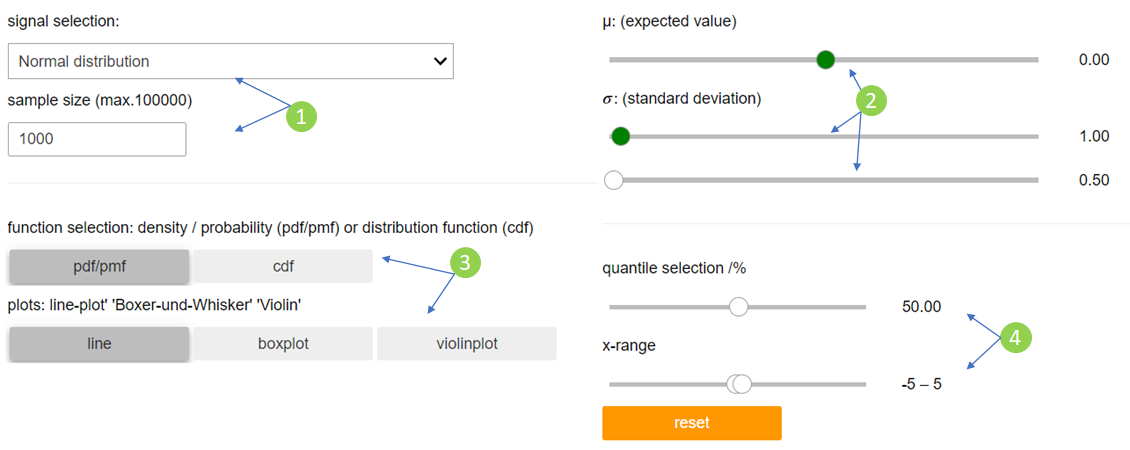

Copyright © 2020 IUBH Internationale Hochschule